In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Features

In [63]:
features={
0:	"srcip",
1:	"sport",
2:	"dstip",
3:	"dsport",
4:	"proto",
5:	"state",
6:	"dur",
7:	"sbytes",
8:	"dbytes",
9:	"sttl",
10:	"dttl",
11:	"sloss",
12	:"dloss",
13:	"service",
14:	"Sload",
15:	"Dload",
16:	"Spkts",
17:	"Dpkts",
18:	'swin',
19:	"dwin",
20:	"stcpb",
21:	"dtcpb",
22:	'smeansz',
23:	"dmeansz",
24:	"trans_depth",
25:	"res_bdy_len",
26:	"Sjit",
27:	"Djit",
28:	"Stime",
29:	"Ltime",
30:	"Sintpkt",
31:	"Dintpkt",
32:	"tcprtt",
33:	"synack",
34:	"ackdat",
35:	"is_sm_ips_ports",
36:	"ct_state_ttl",
37:	"ct_flw_http_mthd",
38:	"is_ftp_login",
39:	"ct_ftp_cmd",
40:	"ct_srv_src",
41:	"ct_srv_dst",
42:	"ct_dst_ltm",
43:	"ct_src_ltm",
44:	"ct_src_dport_ltm",
45:	"ct_dst_sport_ltm",
46:	"ct_dst_src_ltm",
47:	"attack_cat",
48:	"Label",
}

In [104]:
dataset_1=pd.read_csv("../Dataset/UNSW-NB15_1.csv", sep=',', header=None)
print(dataset_1)

/home/manavjeet/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                0      1              2      3    4    5         6      7   \
0       59.166.0.0   1390  149.171.126.6     53  udp  CON  0.001055    132   
1       59.166.0.0  33661  149.171.126.9   1024  udp  CON  0.036133    528   
2       59.166.0.6   1464  149.171.126.7     53  udp  CON  0.001119    146   
3       59.166.0.5   3593  149.171.126.5     53  udp  CON  0.001209    132   
4       59.166.0.3  49664  149.171.126.0     53  udp  CON  0.001169    146   
...            ...    ...            ...    ...  ...  ...       ...    ...   
699996  59.166.0.8  12520  149.171.126.6  31010  tcp  FIN  0.020383    320   
699997  59.166.0.0  18895  149.171.126.9     80  tcp  FIN  1.402957  19410   
699998  59.166.0.0  30103  149.171.126.5   5190  tcp  FIN  0.007108   2158   
699999  59.166.0.6  30388  149.171.126.5    111  udp  CON  0.004435    568   
700000  59.166.0.0   6055  149.171.126.5  54145  tcp  FIN  0.072974   4238   

             8   9   ...  39  40  41 42  43  44  45  46   47  4

#  1 Missing value 
1. Helps in dropping features with high value of missing percentage
2. Can be added as (missing/not missing) feature

In [49]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       700001 non-null  object 
 1   1       700001 non-null  object 
 2   2       700001 non-null  object 
 3   3       700001 non-null  object 
 4   4       700001 non-null  object 
 5   5       700001 non-null  object 
 6   6       700001 non-null  float64
 7   7       700001 non-null  int64  
 8   8       700001 non-null  int64  
 9   9       700001 non-null  int64  
 10  10      700001 non-null  int64  
 11  11      700001 non-null  int64  
 12  12      700001 non-null  int64  
 13  13      700001 non-null  object 
 14  14      700001 non-null  float64
 15  15      700001 non-null  float64
 16  16      700001 non-null  int64  
 17  17      700001 non-null  int64  
 18  18      700001 non-null  int64  
 19  19      700001 non-null  int64  
 20  20      700001 non-null  int64  
 21  21      70

The above info shows that feature 47(attack_category) has significantly less not-null values

# 2 Amount of variation in a field
If the variation is low, the feature will not help in learning

\begin{equation*}
var = \frac{1}{n} \sum_{i=1}^n (x_i-\mu)^2
\end{equation*}

In [130]:
def getSdForDataFrame(dataset):
    dev_list=[]
    feature_list=[]
    for i in features.keys():
        if(dataset[i].to_numpy().dtype!=object):
            std=np.std(dataset[i].to_numpy())
            print(i,features[i],std) 
            dev_list.append(std)
            feature_list.append(i)
    return dev_list,feature_list

In [131]:
#For dataset part 1
dev_list,feature_list=getSdForDataFrame(dataset_1)


6 dur 25.935746096163648
7 sbytes 44898.64802440861
8 dbytes 186051.49094485486
9 sttl 39.99692699377611
10 dttl 30.45073483148317
11 sloss 18.85596586773275
12 dloss 64.73333025984192
14 Sload 51814879.068348885
15 Dload 4499949.075954355
16 Spkts 80.19867191052059
17 Dpkts 138.9352000828112
18 swin 116.08964312682824
19 dwin 116.21143423515011
20 stcpb 1428406695.1775606
21 dtcpb 1430192702.3521006
22 smeansz 163.45659932573594
23 dmeansz 346.40150590273004
24 trans_depth 0.3116135613868189
25 res_bdy_len 48662.02568247913
26 Sjit 15495.026781117846
27 Djit 5131.304742312564
28 Stime 7914.423196258572
29 Ltime 7914.673599462121
30 Sintpkt 3410.623517303776
31 Dintpkt 1746.176216201212
32 tcprtt 0.027176471792417313
33 synack 0.014880491134678783
34 ackdat 0.013971437636477419
35 is_sm_ips_ports 0.0499231911824735
36 ct_state_ttl 0.37139630522092704
37 ct_flw_http_mthd 0.8118416672511234
38 is_ftp_login 0.13870030168660152
39 ct_ftp_cmd 0.278211615741959
40 ct_srv_src 5.07514344162961

<BarContainer object of 41 artists>

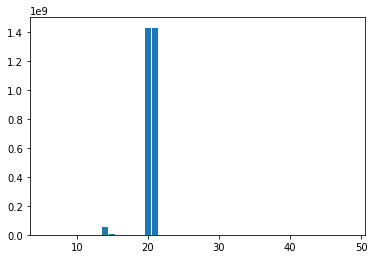

In [139]:
plt.bar(feature_list,dev_list)

## Observation
From the above cell the standard deviation of each feature is different because dataset has not been normalized. Now calling the same function after normalizing.

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [106]:

    def minmaxNormalization(df,name):
        """
        @args
        df: dataframe
        name: name of the column to be used in dataframe

        This function uses max-min normalization to convert the range of values in column to 0-1.

        @returns nothing
        """
        arr=df[name].to_numpy()
        toRet=np.zeros(df.shape[0])
        # avg=np.average(arr)
        s=max(arr)-min(arr)
        mini=min(arr)
        for i in range(arr.shape[0]):
            toRet[i]=(arr[i]-mini)/s
        return toRet

In [147]:
def getSdForDataFrameNormalized(dataset):
    dev_list=[]
    feature_list=[]
    for i in features.keys():
        if(dataset[i].to_numpy().dtype!=object):
            normalized=minmaxNormalization(dataset,i)
            std=np.std(normalized)
            print(i,features[i],std)
            dev_list.append(std)
            feature_list.append(i)
    return dev_list,feature_list

In [148]:
#For dataset part 1 (normalized)
dev_list,feature_list=getSdForDataFrameNormalized(dataset_1)


6 dur 0.0029517259043151715
7 sbytes 0.0032826904969688736
8 dbytes 0.012695066332459516
9 sttl 0.1568506940932397
10 dttl 0.11988478280111484
11 sloss 0.003700150288016631
12 dloss 0.011806188265519227
14 Sload 0.009835777629155244
15 Dload 0.03494782956886344
16 Spkts 0.007862614893188295
17 Dpkts 0.012665013681204304
18 swin 0.45525350245814994
19 dwin 0.45573111464764754
20 stcpb 0.3325782153287247
21 dtcpb 0.33299547423176135
22 smeansz 0.10868124955168613
23 dmeansz 0.23093433726848672
24 trans_depth 0.03895169517335236
25 res_bdy_len 0.023582835590706615
26 Sjit 0.013475202414555427
27 Djit 0.006568312891334396
28 Stime 0.27804051277915237
29 Ltime 0.2784112002062093
30 Sintpkt 0.05683432867938796
31 Dintpkt 0.029354741912814994
32 tcprtt 0.008229030444830273
33 synack 0.007069365447848891
34 ackdat 0.007541708664395254
35 is_sm_ips_ports 0.0499231911824735
36 ct_state_ttl 0.061899384203487805
37 ct_flw_http_mthd 0.022551157423642314
38 is_ftp_login 0.13870030168660152
39 ct_ftp

<BarContainer object of 41 artists>

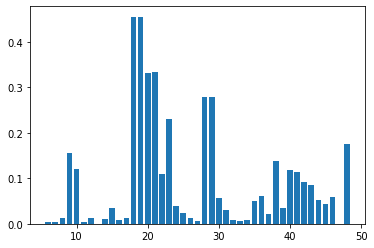

In [149]:
plt.bar(feature_list,dev_list)

# Corelated features
If two features are highly corelated drop one of them.

# Filter Method
https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [ ]:
#To do